# Import packages

In [1]:
import sys
#sys.path.append("D:\Julian\workspace\endolas")
sys.path.append("/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas")

import numpy as np
import matplotlib.pyplot as plt
from endolas import utils
import os
import importlib
import random

import pandas as pd
import seaborn as sns

Segmentation Models: using `tf.keras` framework.


# Load data and plot

In [40]:
width = 384
height = 384

series = 8
experiment = 9
#evalutaion_csv = os.path.abspath('../{}_{}_euclidean/evaluation_spatial.csv'.format(series, experiment))
evalutaion_csv = os.path.abspath('../{}_{}_euclidean/evaluation_display.csv'.format(series, experiment))
data = pd.read_csv(evalutaion_csv)
data_val = data[data.Set=='val'][data.Type=='warped']
data_test = data[data.Set=='test'][data.Type=='warped']

<ipython-input-40-d4ac12191fd9>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_val = data[data.Set=='val'][data.Type=='warped']
<ipython-input-40-d4ac12191fd9>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test = data[data.Set=='test'][data.Type=='warped']


# Distribution

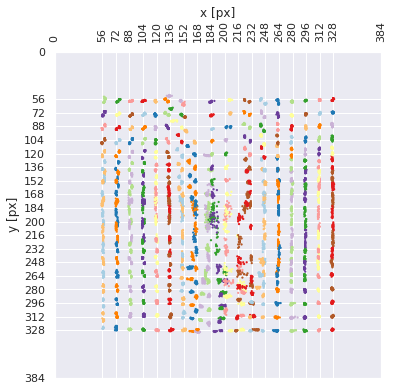

In [41]:
plt.rcParams['figure.figsize'] = 6,6
ax = plt.axes()
#ax.axhline(67, linewidth=1, color='gray')
#ax.axhline(90, linewidth=1, color='gray')
#ax.axhline(112, linewidth=1, color='gray')
#ax.axhline(134, linewidth=1, color='gray')
#ax.axhline(157, linewidth=1, color='gray')

#ax.axvline(67, linewidth=1, color='gray')
#ax.axvline(90, linewidth=1, color='gray')
#ax.axvline(112, linewidth=1, color='gray')
#ax.axvline(134, linewidth=1, color='gray')
#ax.axvline(157, linewidth=1, color='gray')

sns.set()
ax.set(ylim=(0, 384))
ax.set(xlim=(0, width))
ax.xaxis.set_ticks([0,56,72,88,104,120,136,152,168,184,200,216,232,248,264,280,296,312,328,384])
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticks_position('top')
plt.xticks(rotation=90)
ax.yaxis.set_ticks([0,56,72,88,104,120,136,152,168,184,200,216,232,248,264,280,296,312,328,384])
ax.invert_yaxis()

plt.tick_params(top=False)

ax = sns.scatterplot(x="x", y="y", hue="Point",linewidth=0, data=data_test,s=5, ax=ax, palette='Paired')
ax.legend().set_visible(False)

ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')

ax.set_aspect('equal')
plt.savefig("spatial_distribution_{}_test.png".format(experiment))

# Density

No handles with labels found to put in legend.


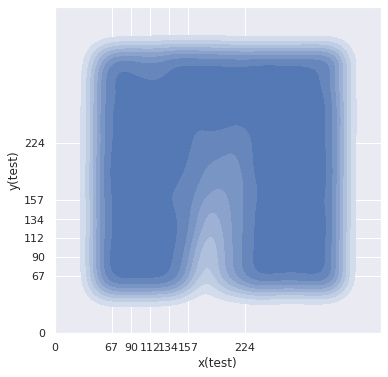

In [11]:
plt.rcParams['figure.figsize'] = 6,6
ax = plt.axes()

sns.set()

ax.set(ylim=(0, height))
ax.set(xlim=(0, width))
ax.xaxis.set_ticks([0,67, 90,112, 134, 157, 224])
ax.yaxis.set_ticks([0,67, 90,112, 134, 157, 224])
#cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(data_test['x'], data_test['y'], shade=True, ax=ax, shade_lowest=False)
ax.legend().set_visible(False)

ax.set_xlabel('x(test)')
ax.set_ylabel('y(test)')

ax.set_aspect('equal')
plt.savefig("spatial_kde_1_test.svg")

# Display

<ipython-input-24-510fee87d042>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_warp = data[data.Set=='test'][data.Image==image]


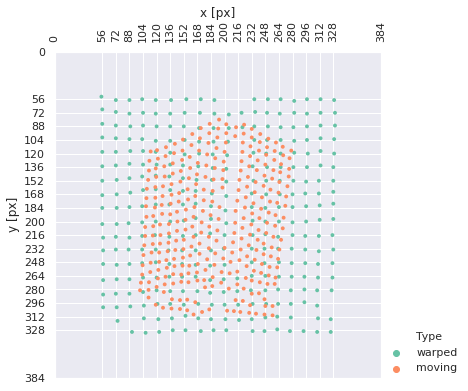

In [24]:
plt.rcParams['figure.figsize'] = 6,6
ax = plt.axes()

sns.set()

image = 9

ax.set(ylim=(0, 384))
ax.set(xlim=(0, width))
ax.xaxis.set_ticks([0,56,72,88,104,120,136,152,168,184,200,216,232,248,264,280,296,312,328,384])
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticks_position('top')
plt.xticks(rotation=90)
ax.yaxis.set_ticks([0,56,72,88,104,120,136,152,168,184,200,216,232,248,264,280,296,312,328,384])
ax.invert_yaxis()
plt.tick_params(top=False)

data_warp = data[data.Set=='test'][data.Image==image]
data_warp["x"][data_warp.Type=='moving'] =data_warp["x"][data_warp.Type=='moving']*0.5
data_warp["y"][data_warp.Type=='moving'] =data_warp["y"][data_warp.Type=='moving']*0.5

ax = sns.scatterplot(x="x", y="y", hue="Type",linewidth=0, data=data_warp,s=15, ax=ax, palette='Set2')

plt.legend(loc=(1.0, 0.0), frameon=False)

ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')

ax.set_aspect('equal')
plt.savefig("display_{}_test_{}.svg".format(experiment,image))